# 선 그래프



In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 선 종류

|문자 |설명|
|------|---|
|'-'|실선|
|'--'|dash선|
|'-.'|dash-dot선|
|':'|점선|

In [49]:
x = np.linspace(0, 10, 11)

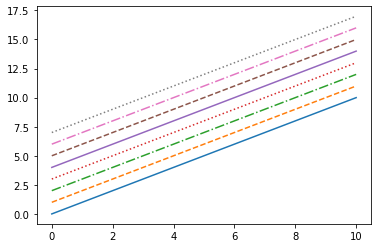

In [50]:
fig = plt.figure()
ax = plt.axes()

plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

In [5]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

## 직선 그래프

y = ax+b 형태의 직선이나 y=h 형태의 가로선 혹은 x=v 형태의 세로선

> plt.plot(x축, 회귀식, data=데이터, c='color') &emsp;<span style="color:green"># y = ax+b 형태의 직선</span><br>
> plt.hlines(y, xmin , xmax) &emsp;<span style="color:green"># y=h 형태의 수평선</span><br>
> plt.vlines(x, ymin , ymax) &emsp;<span style="color:green"># x=v 형태의 수직선</span>


<br>

<b>[예제]</b> 

fifa 데이터에서 passing과 overall 사이의 선형회귀모형을 생성한 뒤, 직선 그래프로 표현하기

선형 회귀식에 대한 그래프는 passing과 overall에 대한 산점도 위에 나타내며, 색상은 빨강으로 지정하여 표현

overall의 중위수는 수평선, passing의 중위수는 수직선으로 그리되 각각의 선은 점 스타일의 회색 선으로 지정

In [51]:
fifa = pd.read_csv('../../data/players_20.csv')
feature = ['sofifa_id','short_name','passing','overall']
fifa = fifa[feature].head(100)
fifa.dropna(inplace=True)
fifa.head()

,sofifa_id,short_name,passing,overall
0,158023,L. Messi,92.0,94
1,20801,Cristiano Ronaldo,82.0,93
2,190871,Neymar Jr,87.0,92
4,183277,E. Hazard,86.0,91
5,192985,K. De Bruyne,92.0,91


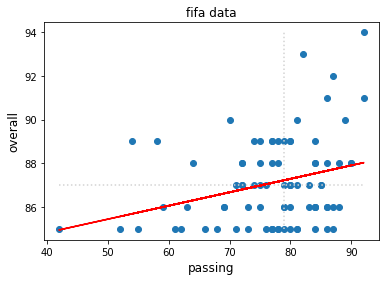

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # 회귀모델 선언
x = fifa[['passing']]
lr.fit(x, fifa['overall']) # 회귀모델 생성

plt.scatter(fifa['passing'], fifa['overall']) # 원 데이터 산포도
plt.plot(fifa['passing'], lr.predict(x), c = 'r' ,linestyle='-') # 회귀직선
plt.hlines(np.median(fifa['overall']),np.min(fifa['passing']),np.max(fifa['passing']), 'lightgrey',linestyles = ':') # passing의 중위수 수평선
plt.vlines(np.median(fifa['passing']),np.min(fifa['overall']),np.max(fifa['overall']), 'lightgrey',linestyles = ':') # overall의 중위수 수직선


plt.xlabel('passing', fontsize=12)
plt.ylabel('overall',fontsize=12)
plt.title('fifa data')
plt.show()

## 곡선 그래프

<br>

<b>[예제]</b> 

평균이 0이고 표준편차가 1인 확률밀도함수를 생성하고 그래프로 나타내기

x축의 범위는 -3 ~ +3으로 한다

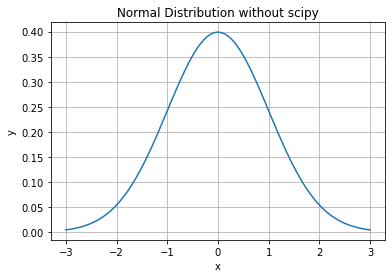

In [53]:
# import matplotlib.pyplot as plt
# import numpy as np
import scipy.stats as stats

# np.linspace(min, max, cnt) : 지정된 간격 동안 균등 한 간격의 숫자를 반환
# -3에서 3까지 100등분하여 값을 지정함
x = np.linspace(-3, 3, 100)
# stats.norm(mean, sd) : 확률밀도를 계산해주는 함수
y = stats.norm(0, 1).pdf(x)

plt.plot(x, y)
plt.xlabel("x") # x축 레이블 지정
plt.ylabel("y") # y축 레이블 지정
plt.grid() # 플롯에 격자 보이기
plt.title("Normal Distribution without scipy")
plt.show()

In [54]:
len(y)

100

In [55]:
len(x)

100

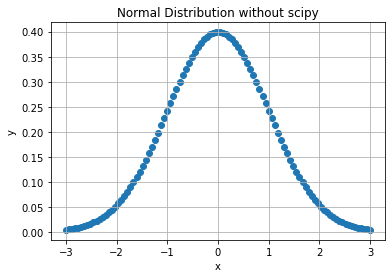

In [56]:
# import matplotlib.pyplot as plt
# import numpy as np
import scipy.stats as stats

# np.linspace(min, max, cnt) : 지정된 간격 동안 균등 한 간격의 숫자를 반환
# -3에서 3까지 100등분하여 값을 지정함
x = np.linspace(-3, 3, 100)
# stats.norm(mean, sd) : 확률밀도를 계산해주는 함수
y = stats.norm(0, 1).pdf(x)

plt.scatter(x,y)

plt.xlabel("x") # x축 레이블 지정
plt.ylabel("y") # y축 레이블 지정
plt.grid() # 플롯에 격자 보이기
plt.title("Normal Distribution without scipy")
plt.show()

<br>

## 꺾은선 그래프

여러 범주에 대한 관측값을 비교하거나 시간의 흐름에 따른 데이터에서 추세를 파악하기 위해 사용

X축은 정렬되어 있어야 함

> plt.plot(x축, y축, data=데이터, ls='-/--/-./:', lw=int_value, c='color')  # ls: 선 스타일, lw:선 굵기<br>
> plt.legend(['항목 이름1','항목 이름2'])

<br>

<b>[예시]</b> Cars93에서 Wheelbase 따른 Type 별 Price의 관측값을 살펴보자

In [57]:
cars = pd.read_csv("../../data/Cars93.csv")
cars.head()


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [60]:
cars.Wheelbase.value_counts()

103    9
97     7
98     6
105    5
101    5
110    5
113    5
104    5
111    5
102    4
99     3
96     3
93     3
106    3
108    3
94     3
115    2
112    2
114    2
116    2
90     2
109    2
107    2
100    2
95     1
117    1
119    1
Name: Wheelbase, dtype: int64

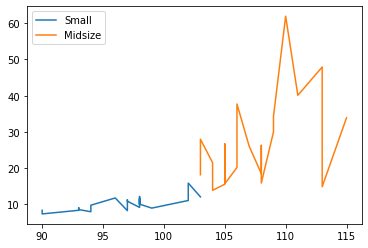

In [62]:

## 선형 그래프를 그릴때에는 X축 정렬을 해줘야 함 

car_type =cars.Type.unique()
car_sorted = cars.sort_values(by=['Wheelbase'])

plt.plot('Wheelbase', 'Price', data=car_sorted.loc[car_sorted['Type']=='Small'])
plt.plot('Wheelbase', 'Price', data=car_sorted.loc[car_sorted['Type']=='Midsize'])




plt.legend(car_type)
plt.show()